# Homework 6 - Cross-validation for parameter selection

In the lecture you have learneed about the $K$-nearest neighbor classifier. It often performs very well, altough its computational cost is very high for higher dimensional problems.

Without worrying about the implementational details, we want to learn about another application of cross-validation: **parameter tuning**.

In this homework, we want make use of cross-validation to tune the parameter $K$, i.e., the number of neighbors used in the $K$-nearest neighbor classifier.

We start by importing the iris dataset known from homework 5.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next, you should try the function `KNeighborsClassifier` from the module `sklearn.neighbors`.

**Task**: Fit a model using the K nearest neighbor classifier.
Use $K=5$ and compute the accuracy of the model, i.e., the proportion of correct classifications.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
neigh.score(X, y)

0.9666666666666667

You should observe an accuracy of $96.67\%$.

Now we want to use cross-validation to tune the parameter $K$.
You should use the function `cross_val_score` from the `sklearn.model_selection` module to get a reliable estimate of the accuracy for a given value of $K$ (number of neighbors).
A good choice for the optional parameter `cv`, which sets the number of folds used for the cross-validation, is 8.
You should also set the optional parameter `scoring`, so that the function returns an array containing the accuracy of each fold.

**Task**:
Complete the following cell.
Perform $K$-nearest neighbor classification for every $K=1,\ldots,25$ using cross-validation with 8 folds.
Store the mean of the accuracy scores in a list.

In [7]:
from sklearn.model_selection import cross_val_score
n_fold = 8
k_range = list(range(1, 26))
k_scores = []

# Use a for-loop to perform the task
for k in k_range:
  neigh = KNeighborsClassifier(n_neighbors=k)
  k_scores.append(cross_val_score(neigh,X,y,cv=n_fold,scoring='accuracy').mean())

print(k_scores)

[np.float64(0.9605263157894737), np.float64(0.9535818713450293), np.float64(0.9671052631578947), np.float64(0.9671052631578947), np.float64(0.9671052631578947), np.float64(0.9736842105263157), np.float64(0.9736842105263157), np.float64(0.9667397660818713), np.float64(0.9733187134502923), np.float64(0.9667397660818713), np.float64(0.9736842105263157), np.float64(0.9733187134502923), np.float64(0.9802631578947367), np.float64(0.9667397660818713), np.float64(0.9667397660818713), np.float64(0.9733187134502923), np.float64(0.9736842105263157), np.float64(0.9802631578947367), np.float64(0.9736842105263157), np.float64(0.9733187134502923), np.float64(0.9667397660818713), np.float64(0.9667397660818713), np.float64(0.9667397660818713), np.float64(0.9535818713450293), np.float64(0.9535818713450293)]


**Task**: What value of $k$ maximizes the accuracy?

In [8]:
import numpy as np
optimal_k_index = np.argmax(k_scores)
optimal_k = k_range[optimal_k_index]
max_accuracy = k_scores[optimal_k_index]

print(f"The optimal K value is: {optimal_k}")
print(f"The maximum accuracy achieved is: {max_accuracy:.4f}")

The optimal K value is: 13
The maximum accuracy achieved is: 0.9803


**Task**: Plot the optained accuracy estimates against the parameter values $K$.

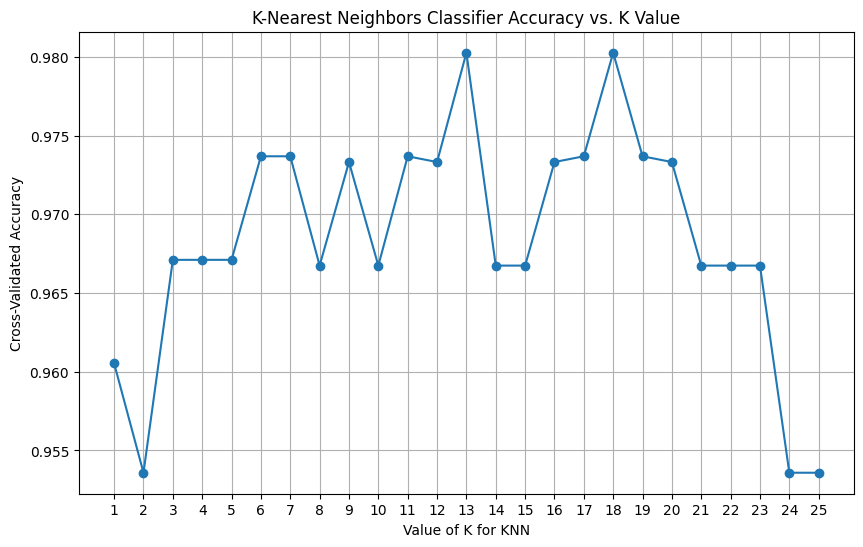

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-Nearest Neighbors Classifier Accuracy vs. K Value')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Task**: Compare your best $K$-nearest neighbor model with linear discriminant analysis using cross-validation with 8 folds.